# DRL in VTA DANs

In [44]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [10]:
data = loadmat('DlDisc_5days_SM143_data.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'fluo_all_conc', 'licks_all_conc', 'rotenc_all_conc', 'Rsize_all', 'Rdelay_all'])


# 1) Temporal Shift - Variable Reward Task

## Heatmaps

In [4]:
mouse = '160'
data = loadmat(f'learning/Es163O_5days_SM{mouse}_data.mat')['fluo_all_conc'][0]
print("Total number of tasks: " + str(len(data)))
for i in range(len(data)):
    print("Dimensions of task " + str(i) + ": " + str(data[i].shape))

Total number of tasks: 3
Dimensions of task 0: (520, 80, 15)
Dimensions of task 1: (520, 301, 15)
Dimensions of task 2: (520, 305, 15)


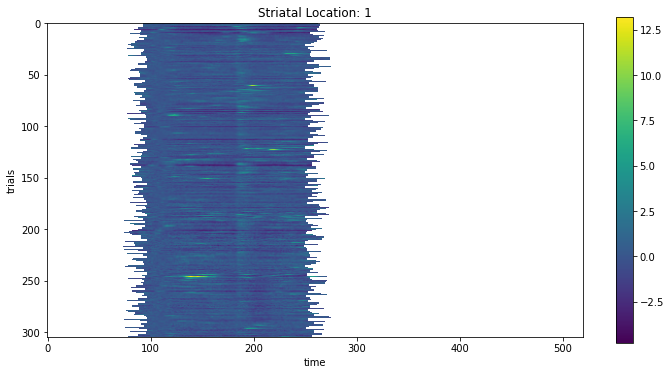

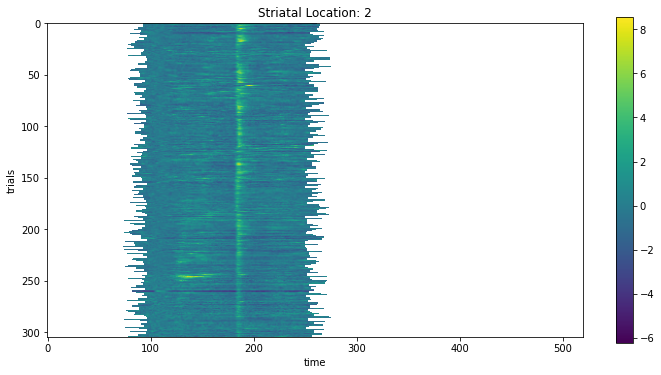

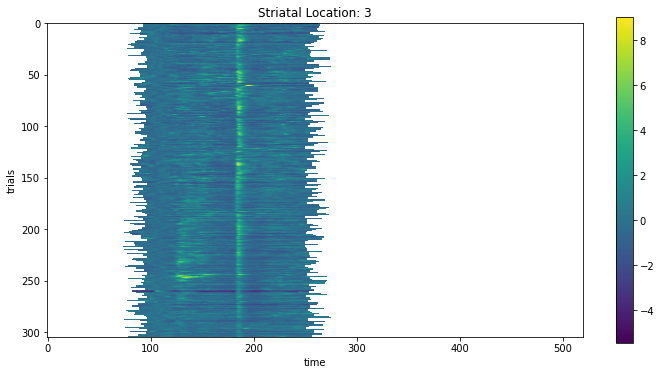

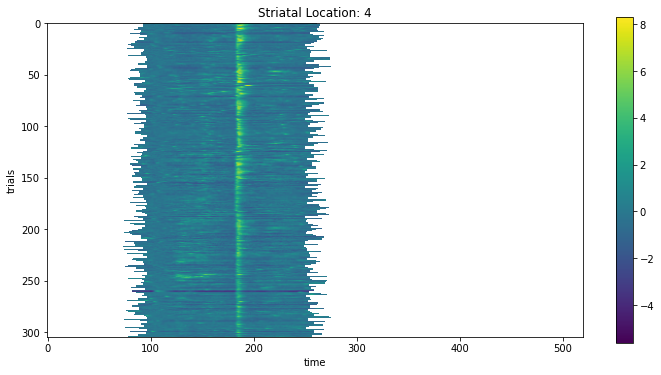

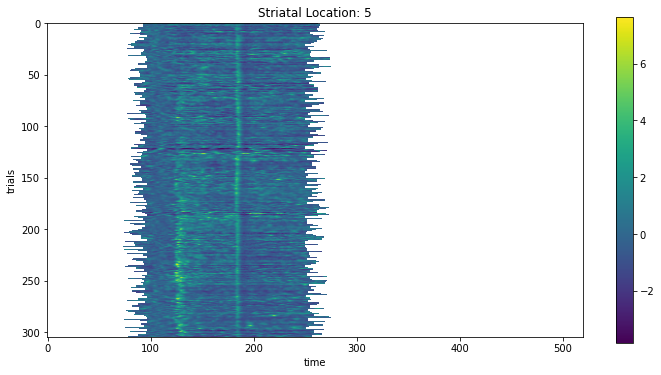

In [56]:
task = 2
locations = range(0,3)

###########

df = data[task]
for i in locations:
  plt.figure(figsize=(12, 6))
  plt.imshow(df[:, :, i].T, cmap='viridis')
  plt.title('Striatal Location: ' + str(i + 1))
  plt.colorbar()
  plt.xlabel('time')  # Update x-axis title
  plt.ylabel('trials')  # Update y-axis title
  plt.show()


## Spike detection

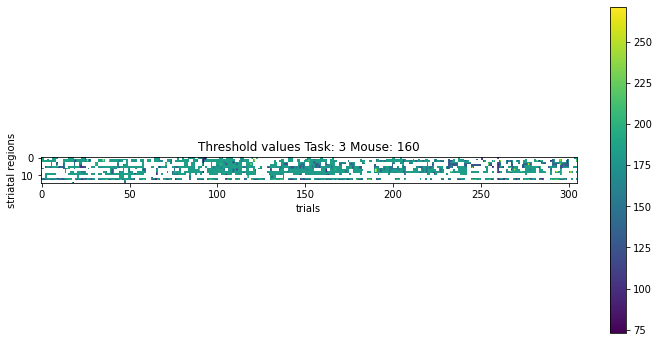

In [57]:
#1c

task = 2

##########################

df = data[task]
thresh = np.empty((df.shape[1], df.shape[2]))

# Iterate through trials
for trial in range(df.shape[1]):
    # Iterate through striatal regions
    for region in range(df.shape[2]):
        values = df[:, trial, region]

        # Find the indices where values are not NaN
        valid_indices = np.where(~np.isnan(values))[0]

        # Calculate the mean and standard deviation of the non-NaN values
        mean = np.mean(values[valid_indices])
        std = np.std(values[valid_indices])

        #print(mean, std)

        # Find the index of the first value that is 3 standard deviations above the mean
        threshold = mean + 3.25 * std
        above_threshold_indices = np.where(values > threshold)[0]

        # Store the time-step of the first value above the threshold in the vector
        if len(above_threshold_indices) > 0:
            thresh[trial, region] = above_threshold_indices[0]
        else:
            thresh[trial, region] = np.nan

# Plot the threshold values
plt.figure(figsize=(12, 6))
plt.imshow(thresh.T, cmap='viridis')
plt.title('Threshold values' + ', Task: ' + str(task + 1) + ', Mouse: ' + mouse)
plt.colorbar()
plt.xlabel('trials')  # Update x-axis title
plt.ylabel('striatal regions')  # Update y-axis title
plt.gcf().set_facecolor('white')
# Optionally, you can also set the edge color if needed
plt.gcf().set_edgecolor('white')
plt.show()

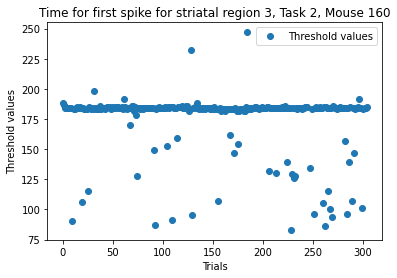

In [56]:
striatal_region = 3

# Get the values for the selected striatal region
values = thresh[:, striatal_region]

# Create an array of trial indices
trials = np.arange(len(values))

# Plot the values
plt.plot(trials, values, 'o', label='Threshold values')

# # Fit a logistic regression model
# # Create the logistic regression model
# logreg = LogisticRegression(nan_policy='omit')

# # Fit the model to your data
# logreg.fit(X, y)
# model.fit(trials.reshape(-1, 1), values)

# # Generate predictions using the logistic regression model
# predictions = model.predict(trials.reshape(-1, 1))

# # Plot the logistic regression line
# plt.plot(trials, predictions, label='Logistic Regression')

# Set the x-axis label
plt.xlabel('Trials')

# Set the y-axis label
plt.ylabel('Threshold values')

# Add a title
plt.title('Time for first spike for striatal region ' + str(striatal_region + 1) + ', Task ' + str(task + 1) + ', Mouse ' + mouse)

# Add a legend
plt.legend()

plt.gcf().set_facecolor('white')

# Optionally, you can also set the edge color if needed
plt.gcf().set_edgecolor('white')

# Show the plot
plt.show()




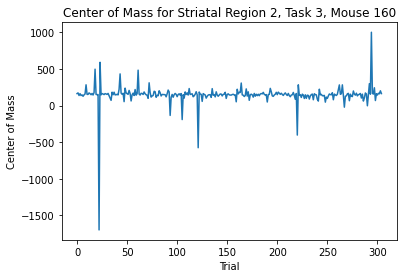

In [58]:
import numpy as np
#1e

task = 2

##########################

df = data[task]

# Initialize an empty array to store the center of mass values
center_of_mass_list = np.empty((df.shape[2], df.shape[1]))

# Iterate through each region
for region in range(df.shape[2]):
    # Iterate through each trial
    for trial in range(df.shape[1]):
        # Get the activity in the CS-US interval for the current trial and region
        activity = df[115:186, trial, region]

        # Calculate the center of mass
        center_of_mass = np.sum(activity * np.arange(115, 186)) / (1 + np.sum(activity))

        # Store the center of mass in the corresponding cell
        center_of_mass_list[region, trial] = center_of_mass

region = 2
plt.plot(range(center_of_mass_list.shape[1]), center_of_mass_list[region])
plt.xlabel('Trial')
plt.ylabel('Center of Mass')
plt.title('Center of Mass for Striatal Region ' + str(region) + ', Task ' + str(task + 1) + ', Mouse ' + mouse)
plt.gcf().set_facecolor('white')

# Optionally, you can also set the edge color if needed
plt.gcf().set_edgecolor('white')
plt.show()


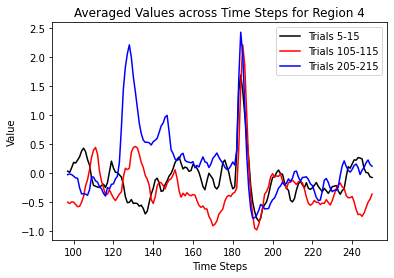

In [54]:
# 1f

task = 2
# (3, 5), 
region = 4

##########################

df = data[task]
trials = [[5, 25], [105, 125], [205, 225]]
colors = ['black', 'red', 'blue']

for trial_range, color in zip(trials, colors):
    trial_start, trial_end = trial_range
    averaged_values = np.mean(df[:, trial_start:trial_end+1, region], axis=1)
    plt.plot(range(len(averaged_values)), averaged_values, color=color)

plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Averaged Values across Time Steps for Region ' + str(region))
plt.legend(['Trials 5-15', 'Trials 105-115', 'Trials 205-215'])
plt.gcf().set_facecolor('white')

# Optionally, you can also set the edge color if needed
plt.gcf().set_edgecolor('white')
plt.show()


In [ ]:
# 1g

In [ ]:
# 1h

In [ ]:
# 1i

In [ ]:
# 1j